In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta

# Load the dataset
df = pd.read_csv('../../data/a1/pm_bangkok_avg.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

# Fit SARIMA model (you can tune the (p,d,q)(P,D,Q,s) parameters)
model = SARIMAX(df['avg'], order=(1,1,1), seasonal_order=(1,1,1,365))
results = model.fit(disp=False)

# Forecast next 30 days
forecast_steps = 30
future_dates = [df.index[-1] + timedelta(days=i) for i in range(1, forecast_steps + 1)]
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['avg'], label='Observed')
plt.plot(future_dates, forecast_mean, color='red', label='Forecast (Next 30 days)')
plt.axvline(df.index[-1], color='gray', linestyle='--', alpha=0.7)
plt.legend()
plt.title("SARIMA Forecast of 'avg' Values")
plt.xlabel("Date")
plt.ylabel("avg")
plt.grid(True)
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0, 0.5, 'avg')

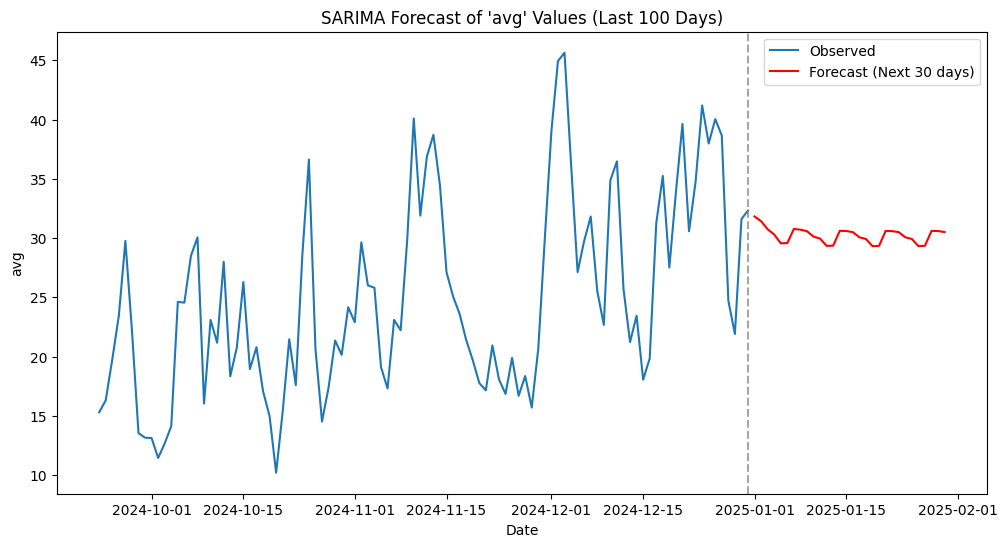

In [ ]:
#zoom only last 100 days
plt.figure(figsize=(12, 6))
plt.plot(df.index[-100:], df['avg'][-100:], label='Observed')
plt.plot(future_dates, forecast_mean[-100:], color='red', label='Forecast (Next 30 days)')
plt.axvline(df.index[-1], color='gray', linestyle='--', alpha=0.7)
plt.legend()
plt.title("SARIMA Forecast of 'avg' Values (Last 100 Days)")
plt.xlabel("Date")
plt.ylabel("avg")